In [ ]:
#@title
import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)

In [ ]:
#@title
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)

In [ ]:
#@title
def raca(x):
    list_valor_raca = ["Não Declarado","Branca","Preta","Parda","Amarela","Indigena"]
    return list_valor_raca[x]

dados['VALOR_CODIGO_RACA']=dados['TP_COR_RACA'].apply(raca)

In [ ]:
#@title
import string
values = dict()
for index, letter in enumerate(string.ascii_uppercase):
   values[letter] = index + 0

def classe_economica(x):
    list_valor_classe_economica = ["Classe E","Classe E","Classe E","Classe E","Classe D","Classe D","Classe D","Classe C","Classe C","Classe C","Classe C","Classe C","Classe C","Classe B","Classe B","Classe B","Classe A"]
    return list_valor_classe_economica[values[x]]

dados['CLASSE_ECONOMICA']=dados['Q006'].apply(classe_economica)
dados["RAÇA_CLASSE_ECONOMICA"] = dados["CLASSE_ECONOMICA"] + " - " + dados["VALOR_CODIGO_RACA"]

In [ ]:
#@title
dados_sem_nota_zero_sem_treineiros_cores_definidas = dados.query("IN_TREINEIRO == 0 & NU_NOTA_TOTAL !=0 & TP_COR_RACA >0 & TP_COR_RACA <4")
dados_faltantes_sem_treineiro_cores_definidas = dados.query("IN_TREINEIRO == 0 & NU_NOTA_TOTAL ==0 & TP_COR_RACA >0 & TP_COR_RACA <4")

In [ ]:
#@title
def nota_zero(x):
  if x:
    return "Presente"
  return "Ausente/Eliminado"

dados['TP_PRESENCA_GERAL']=dados['NU_NOTA_TOTAL'].apply(nota_zero)
dados_sem_treineiro_cores_definidas = dados.query("IN_TREINEIRO == 0 & TP_COR_RACA >0 & TP_COR_RACA <4")




# Racismo Estrutural no Brasil

Recentemente, uma grande empresa de varejo chamou a atenção da mídia por abrir vagas para Trainee Negros. Em seu discurso, a Dona Luiza Trajano afirmou: ***Temos que entender mais o que é racismo estrutural. O dia que entendi até chorei, porque sempre achei que não era racista até entender o racismo estrutural.***

Ela utilizou o exemplo de que estes candidatos negros não aparecem para a seleção de processos seletivos, onde utilizou a expressão "O ponto de partida já é desigual".

Será que a análise da base de dados do ENEM 2019, que é muito utilizada para analisar a qualidade da educação fundamental e média do pais, além da composição sôcio-econônica, pode indicar algo sobre o racismo estrutural?

## Composição étnica na sociedade Brasileira

De acordo com o [PNAD 2019](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html), a sociedade brasileira é composta por:


*   Pardos - 46,8%
*   Brancos - 42,7%
*   Pretos  - 9,4%

Estas 3 etnias representam 98,9% da população, e é sobre estas que iremos realizar a análise dos dados. É natural que em uma sociedade igualitária, as distribuições por diferentes pontos de vista mantenham essa mesma representatidade.








## Base de Estudo

Será utilizado uma amostra dos dados do ENEM2019 como referência para o estudo. Serão retirados da amostra os candidatos que não declararam a COR, além dos candidatos de cor amarela e indígena. Além disso, candidatos treineiros também serão desconsiderados. Nos dados que envolver a nota final do ENEM, será considerado apenas os candidatos que estiveram presentes a prova.

## Análise da amostra do ENEM 2019

Foi procurado identificar se a amostragem dos candidatos ao ENEM 2019 correspondia com a proporção calculada com o IBGE. Foi possível constatar que a proporção possui uma pequena variação, mas respeita as amostragens obtidas no PNAD 2019.

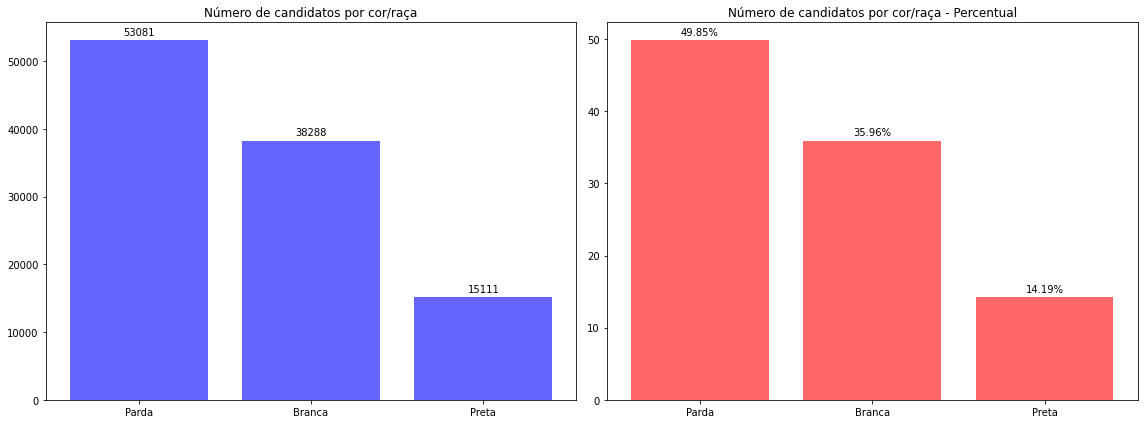

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np

def autolabel_perc(rects,axx):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axx.annotate("{:.2f}%".format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
def autolabel(rects,axx):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axx.annotate("{:.0f}".format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

count_cor = dados_sem_treineiro_cores_definidas["VALOR_CODIGO_RACA"].value_counts().values
cor_raca = dados_sem_treineiro_cores_definidas["VALOR_CODIGO_RACA"].value_counts().index

fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(16)

rects1 = ax1.bar(cor_raca, count_cor, alpha = .6, color = "Blue")
ax1.set_xticklabels(cor_raca)
ax1.set_title("Número de candidatos por cor/raça")
autolabel(rects1,ax1)

count_cor2 = dados_sem_treineiro_cores_definidas["VALOR_CODIGO_RACA"].value_counts(normalize=1).values*100
#count_cor2 = _count_cor2.apply(formata_string)
_count_cor2 = [round(item,2) for item in count_cor2]
rects2 = ax2.bar(cor_raca, _count_cor2, alpha = .6, color = "Red")
ax2.set_title("Número de candidatos por cor/raça - Percentual")
autolabel_perc(rects2,ax2)

fig.tight_layout()






### Análise das notas do Enem por Cor

Para se ter uma ideia da distribuição das notas dos candidatos do ENEM, foi traçado um histograma normalizado com base nas notas. Com isso, é constatado visualmente que foi mais comum candidatos de Cor Branca obter notas mais altas que candidatos de outras cores.

Mas como em toda a análise, não é possivel obter conclusões definitivas de um único dado. Um argumento muito utilizado por pessoas de opinião contrária as políticas públicas e ações afirmas de inclusão social com base na cor, são de que o maior fator influenciador é a classe econômica. Com isso, vamos basear as próximas analises de Cor levando em consideração a classe econômica.

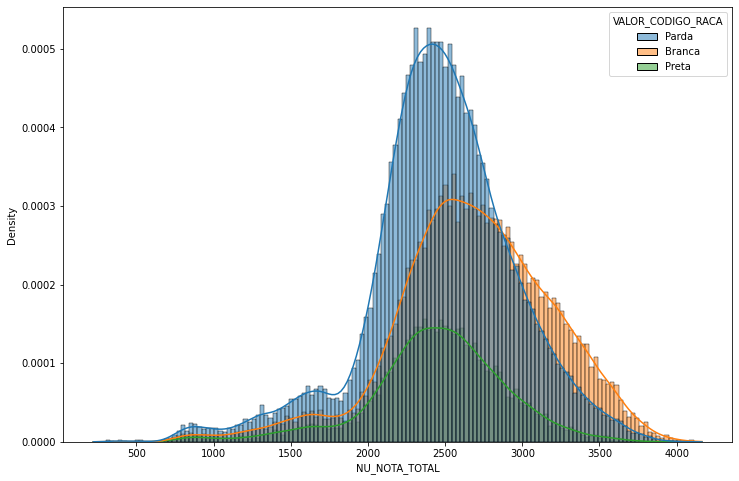

In [ ]:
#@title
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero_sem_treineiros_cores_definidas, x = "NU_NOTA_TOTAL", hue="VALOR_CODIGO_RACA", kde=True, stat="density")




# Racismo Estrutural e a composição socio-economica

É indiscutivel o legado da escravidão na composição socio-economica. Mas será que este legado pode ainda influenciar hoje, com mais de 100 anos da Lei Aurea?

Como o ENEM 2019 faz um questionamento de multipla escolha da renda familiar, foi convertido para a classificação comumente usada pelo IBGE:



*   Classe E - Até 2 Salários Minimos - R$ 2090,00

*   Classe D - Até 4 Salários Minimos - R$ 4180,00

*   Classe C - Até 10 Salários Minimos - R$ 10450,00

*   Classe B - Até 20 Salários Minimos - R$ 20900,00

*   Classe A - Acima de 20 Salários Minimos - Acima de R$ 20900,00

É possivel perceber a disparidade economica entre diferentes cores. Enquanto brancos representam quase a totalidade das Classes A e B, pretos e pardos são maioria nas Classe D e E. 

Além disso, quando comparado a pessoas do mesmo grupo étnico, é perceptivel que a ampla maioria de pretos e pardos vivem em padrões bem abaixo economicamente do que brancos.

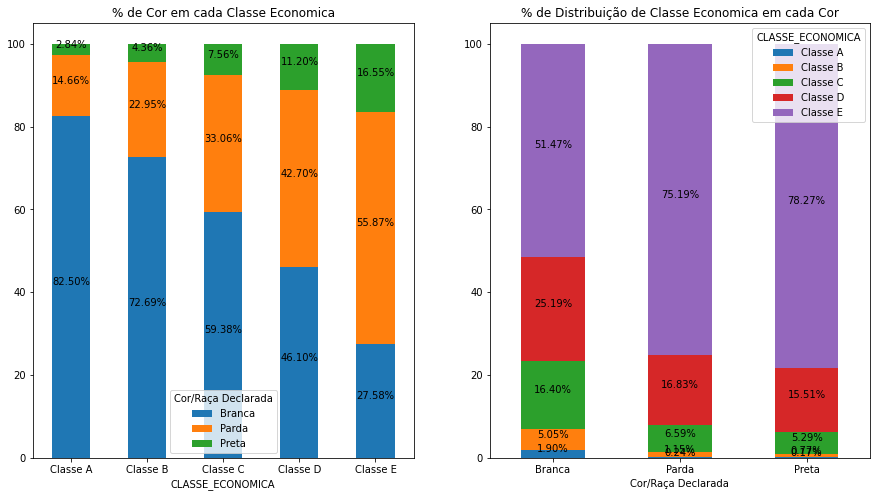

In [ ]:
#@title
#dados_sem_treineiro_cores_definidas
_dd1 = pd.crosstab(dados_sem_treineiro_cores_definidas["CLASSE_ECONOMICA"],dados_sem_treineiro_cores_definidas["VALOR_CODIGO_RACA"]).apply(lambda r: r/r.sum()*100, axis=1)
_dd2 = pd.crosstab(dados_sem_treineiro_cores_definidas["VALOR_CODIGO_RACA"],dados_sem_treineiro_cores_definidas["CLASSE_ECONOMICA"]).apply(lambda r: r/r.sum()*100, axis=1)

fig, (ax3,ax4) = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(30)
ax_3 = _dd1.plot.bar(ax=ax3,figsize=(15,8),stacked=True, rot=0)
ax3.set_title("% de Cor em cada Classe Economica")
ax3.legend(title="Cor/Raça Declarada")
ax_4 = _dd2.plot.bar(ax=ax4,figsize=(15,8),stacked=True, rot=0)
ax4.set_title("% de Distribuição de Classe Economica em cada Cor")
ax4.set_xlabel("Cor/Raça Declarada")

#plt.xlabel('Name')
#plt.ylabel('Percent Distribution')

for rec in ax_3.patches:
    height = rec.get_height()
    ax_3.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.2f}%".format(height),
              ha='center', 
              va='bottom')
    
for rec in ax_4.patches:
    height = rec.get_height()
    ax_4.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.2f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

Para visualizar o quanto esta composição afetou na nota do ENEM, foi realizado o diagrama de caixas abaixo que compara diferentes cores nas diferentes classes.

É perceptivel o efeito que a classe economica tem na nota do ENEM. Enquanto candidatos de classe economica mais alta costumam ter notas as melhores notas, os candidatos da camada economica inferior da sociedade estão estre as piores notas.

O que chama a atenção deste gráfico é que comparando pessoas de diferentes cor no mesmo grupo economico, em todas elas pessoas brancas possuem melhor resultado que pretos e pardos.

Text(0.5, 1.0, 'Notas totais por Renda e Cor/Raça')

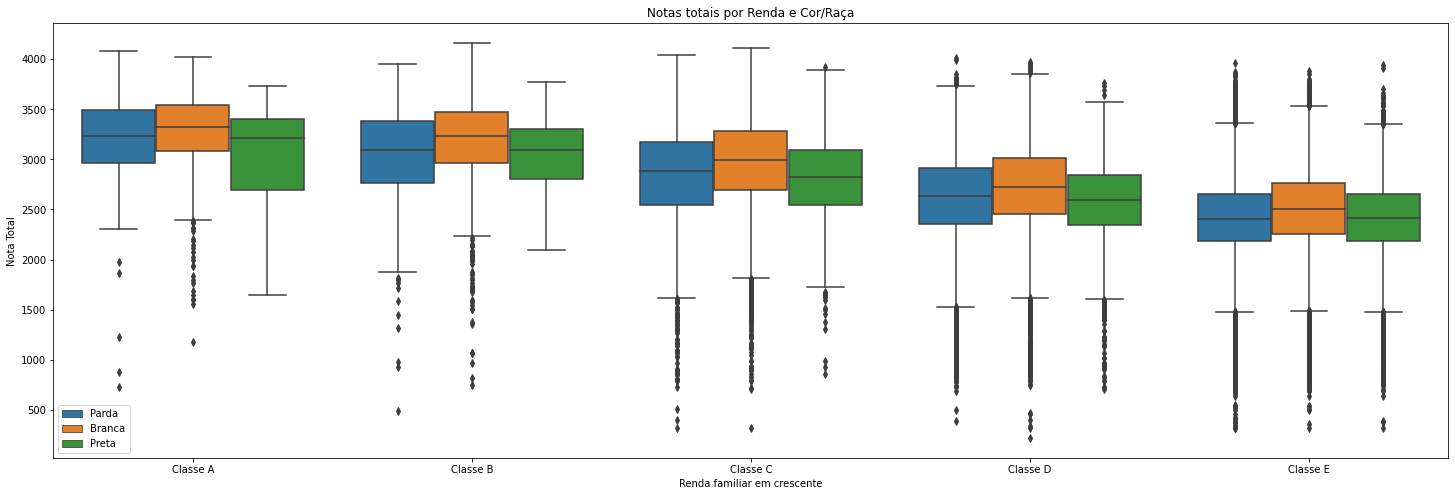

In [ ]:
#@title
import seaborn as sns

plt.figure(figsize=(25, 8))

classe_economica = dados_sem_nota_zero_sem_treineiros_cores_definidas["CLASSE_ECONOMICA"].unique()
classe_economica.sort()

sns.boxplot(x="CLASSE_ECONOMICA", y="NU_NOTA_TOTAL", data = dados_sem_nota_zero_sem_treineiros_cores_definidas, hue="VALOR_CODIGO_RACA", order = classe_economica)
plt.xlabel("Classe Economica")
plt.ylabel("Nota Total")
L=plt.legend()
plt.title("Notas totais por Renda e Cor/Raça")

Para efeitos comparativos, foi ajuntado os diferentes diagramas de classes, de maneira a permitir a comparação visual entre cores e grupos economicos diferentes. Os dados foram ordenados pela média do grupo.

É possível constatar que candidatos brancos de Classe B obtiveram notas similares ou maiores que candidatos pardos e pretos de Classe A. O padrão se repete para as demais classes, onde ao se basear por um modelo de dados que leve apenas os 2 parametros utilizados em conta, seria necessário um candidato de cor preta ou parda estar a um nivel economico acima para ter as mesmas chances de um candidato branco.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Notas totais por Renda e Cor/Raça')

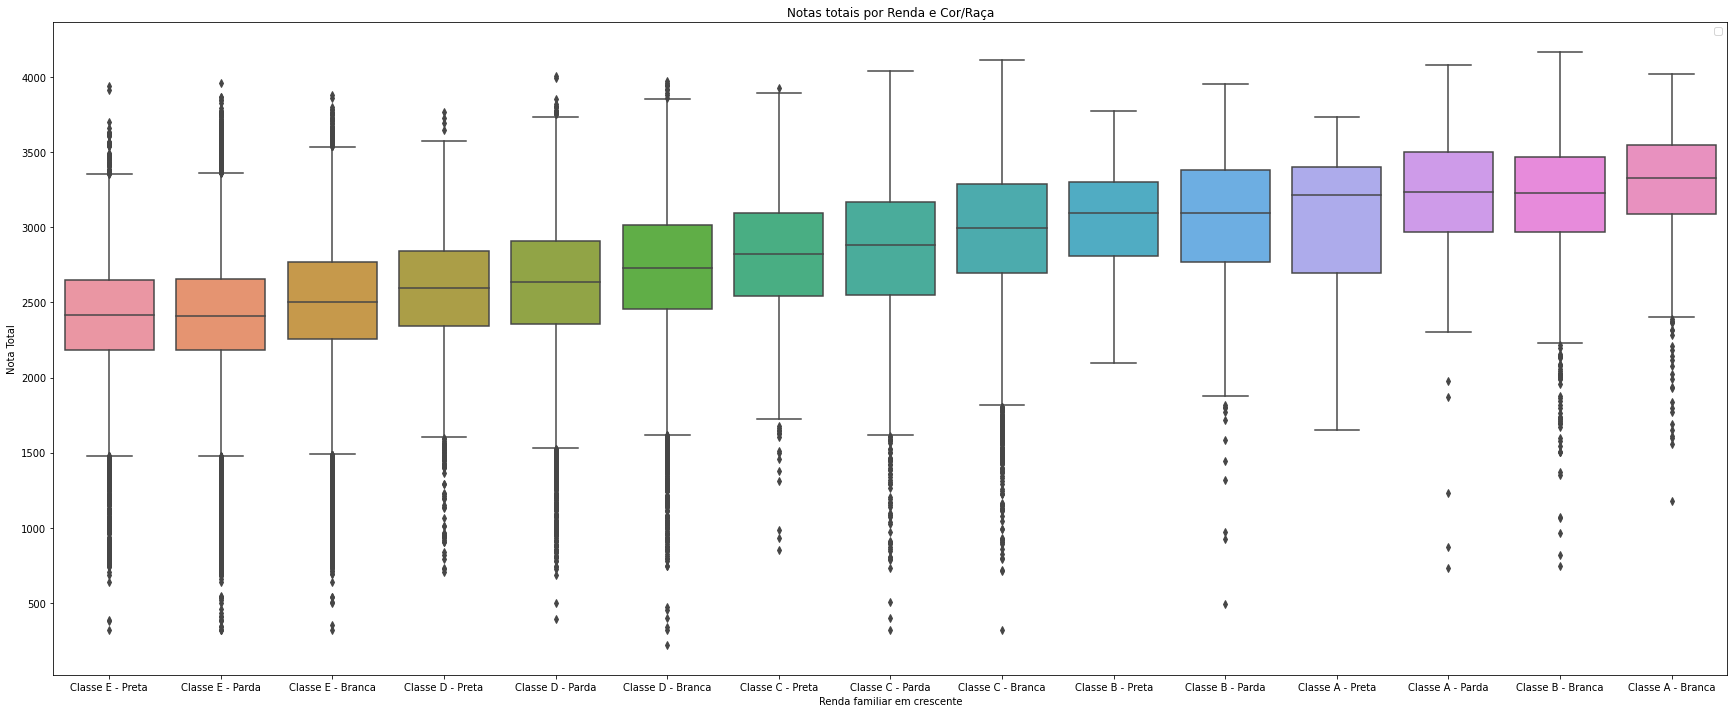

In [ ]:
#@title
plt.figure(figsize=(30, 12))

classe_economica_teste = dados_sem_nota_zero_sem_treineiros_cores_definidas[["RAÇA_CLASSE_ECONOMICA","NU_NOTA_TOTAL"]]
tt = classe_economica_teste.groupby("RAÇA_CLASSE_ECONOMICA")["NU_NOTA_TOTAL"].mean()
tt = tt.to_frame().reset_index()
tt = tt.rename(columns= {0: 'mean'})
tt.index.name = 'index'
tt_ordenado = tt.sort_values(by=["NU_NOTA_TOTAL"])


sns.boxplot(x="RAÇA_CLASSE_ECONOMICA", y="NU_NOTA_TOTAL", data = dados_sem_nota_zero_sem_treineiros_cores_definidas, order = tt_ordenado["RAÇA_CLASSE_ECONOMICA"])
plt.xlabel("Classe_Economica - Cor")
plt.ylabel("Nota Total")
L=plt.legend()
plt.title("Notas totais por Renda e Cor/Raça")

Para medir a correlação entre essas duas variáveis e a Nota do Enem, foi utilizado um mapa de calor. Nesse, é possivel constatar que, apesar das informações acima, a correlação é maior com a classe economica (0,42) do que com a cor do candidato (0,19)

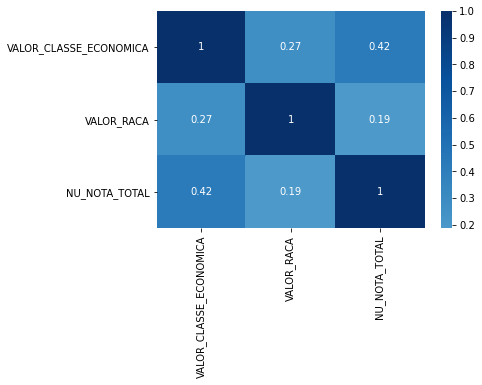

In [ ]:
#@title
values = dict()
for index, letter in enumerate(string.ascii_uppercase):
   values[letter] = index + 0

def valor_classe_economica(x):
    return values[x]

def valor_raca(x):
    if x==1: #branco
      return 2
    if x==2: #preto
      return 0
    if x==3: # pardo
      return 1
    return -1

dados_sem_nota_zero_sem_treineiros_cores_definidas['VALOR_CLASSE_ECONOMICA']=dados_sem_nota_zero_sem_treineiros_cores_definidas['Q006'].apply(valor_classe_economica)
dados_sem_nota_zero_sem_treineiros_cores_definidas['VALOR_RACA']=dados_sem_nota_zero_sem_treineiros_cores_definidas['TP_COR_RACA'].apply(valor_raca)

dados_correlação = dados_sem_nota_zero_sem_treineiros_cores_definidas[["VALOR_CLASSE_ECONOMICA","VALOR_RACA","NU_NOTA_TOTAL"]]
correlacao = dados_correlação.corr()
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

# Conclusões

Nesta análise, foi possivel verificar com base nos dados do ENEM indicios de um racismo estrutural. Apesar da correlação direta entre cor e nota do enem ser fraca, a composição economica da sociedade (onde pretos e pardos são a maioria nos classes mais pobres e brancos são a maioria nas classes mais ricas) e que no mesmo grupo economico, pretos e pardos tiram menores médias, indicam que candidatos pretos e pardos não possuem igualdade de disputa com candidatos brancos, podendo dar um embasamento as ações de afirmações sociais étnicas.

Como complemento a este estudo, devido a proporção continental de nosso país, seria interessante analisar como estes dois parametros também se relacionam com a região ou estado do candidato. Também seria interessante verificar os mesmos dados com o grau de escolaridade dos pais ou acesso a saneamento.